### CONTENTS
#### 1 Importing Libraries
#### 2 Importing Data 
#### 3 Data wrangling
#### 4 Random Forest Analysis
#### 5 Weather Feature Importance Analysis: Munchenb


# 1 Importing Libraries

In [444]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, classification_report
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score


# 2 Importing Data

In [447]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [449]:
# Upload cleaned data

In [451]:
climate = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'weather_cleaned1.csv'), index_col = False)

In [452]:
climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [455]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3 Data Wrangling

In [458]:
# Create a list of the columns containing "Munchenb" in their names

munchenb_list = list(x for x in climate.columns if x.find('MUNCHENB') >=0)
munchenb_list

['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']

In [460]:
# Create a dataframe with those columns

df_munchenb = climate[munchenb_list]
df_munchenb

MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_pressure  \
0                         5               0.67             1.0304   
1                         6               0.72             1.0292   
2                         6               0.91             1.0320   
3                         6               0.90             1.0443   
4                         5               0.85             1.0430   
...                     ...                ...                ...   
22945                     2               0.76             1.0263   
22946                     6               0.70             1.0263   
22947                     7               0.64             1.0263   
22948                     6               0.75             1.0263   
22949                     5               0.83             1.0263   

       MUNCHENB_global_radiation  MUNCHENB_precipitation  MUNCHENB_sunshine  \
0                           0.20                    0.10                0.0   
1                           0.61                    0.30                5.1   
2                           0.20                    0.30                0.0   
3                           0.20                    0.01                0.0   
4                           0.65                    0.96                5.6   
...                          ...                     ...                ...   
22945                       1.37                    0.26                9.7   
22946                       1.37                    0.26                7.7   
22947                       1.37                    0.26                6.8   
22948                       1.37                    0.26                8.3   
22949                       1.37                    0.26                6.8   

       MUNCHENB_temp_mean  MUNCHENB_temp_min  MUNCHENB_temp_max  
0                     6.9                1.1               10.4  
1                     6.2                4.2               10.2  
2                     5.8                4.0                8.0  
3                     3.9                3.2                5.4  
4                     1.8               -3.0                6.0  
...                   ...                ...                ...  
22945                14.3                8.3               22.2  
22946                16.1                8.9               26.1  
22947                17.4               11.2               26.2  
22948                14.5                9.2               23.5  
22949                12.9                7.9               19.6  

[22950 rows x 9 columns]

In [462]:
# Reduce true classifications to munchenb answers only

answers_munchenb = pleasantweather['MUNCHENB_pleasant_weather']
answers_munchenb

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [464]:
df_munchenb.shape 

(22950, 9)

In [466]:
answers_munchenb.shape

(22950,)

In [468]:
X = df_munchenb

In [470]:
y = answers_munchenb

In [472]:
# Turn X and y from a df to NumPy arrays

X = np.array(X)
y = np.array(y)

# 4 Random Forest Analysis

In [475]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [477]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [479]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [481]:
# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [482]:
from sklearn.metrics import f1_score

# Get weighted average F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 1.0000


In [485]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = clf.predict(X_test)

# Generate the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4546
           1       1.00      1.00      1.00      1192

    accuracy                           1.00      5738
   macro avg       1.00      1.00      1.00      5738
weighted avg       1.00      1.00      1.00      5738



The model showed perfect performance.

In [488]:
# Firgure to illustrate one of the decision trees

In [490]:
types = {0:'Unpleasant', 1:'Pleasant'}

fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

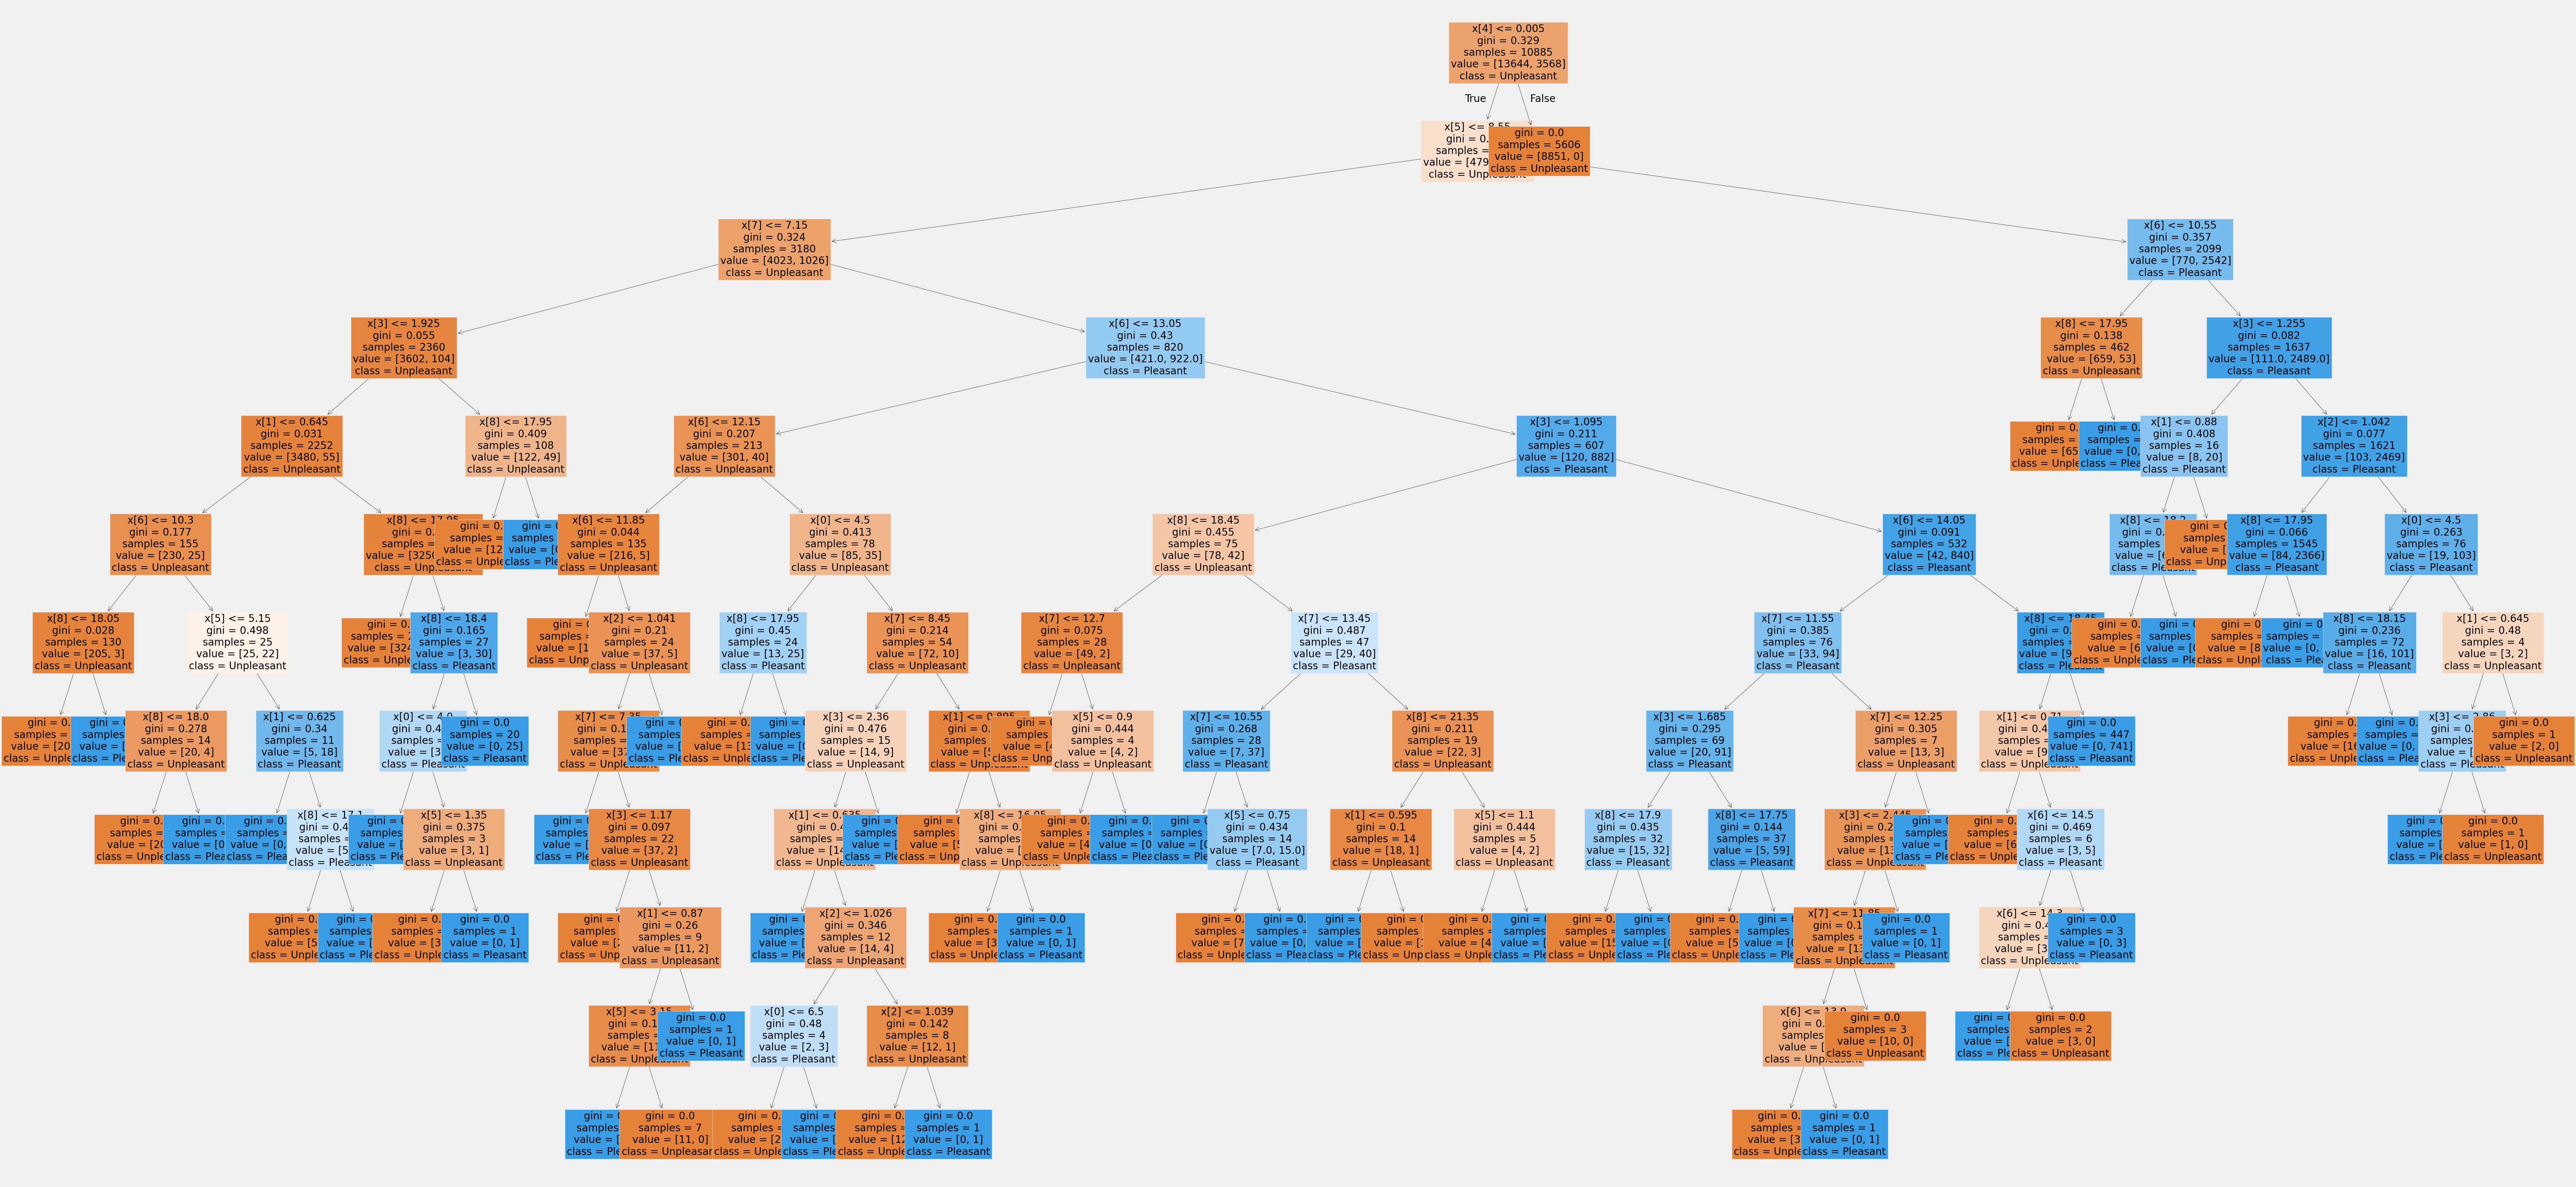

In [492]:
plt.show()

In [494]:
fig1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tree_muchenb.png'))

# 5 Weather Feature Importance Analysis: Munchenb

In [497]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (135,)
newarray # This shows the raw importance values

(9,)


array([0.03705942, 0.0105929 , 0.00961101, 0.06005133, 0.36671429,
       0.08999695, 0.11930129, 0.02610995, 0.28056287])

In [504]:
# Create a list of weather features

wx_list = [feature.replace('MUNCHENB_', '') for feature in munchenb_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [506]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.037059
humidity            0.010593
pressure            0.009611
global_radiation    0.060051
precipitation       0.366714
sunshine            0.089997
temp_mean           0.119301
temp_min            0.026110
temp_max            0.280563
dtype: float64

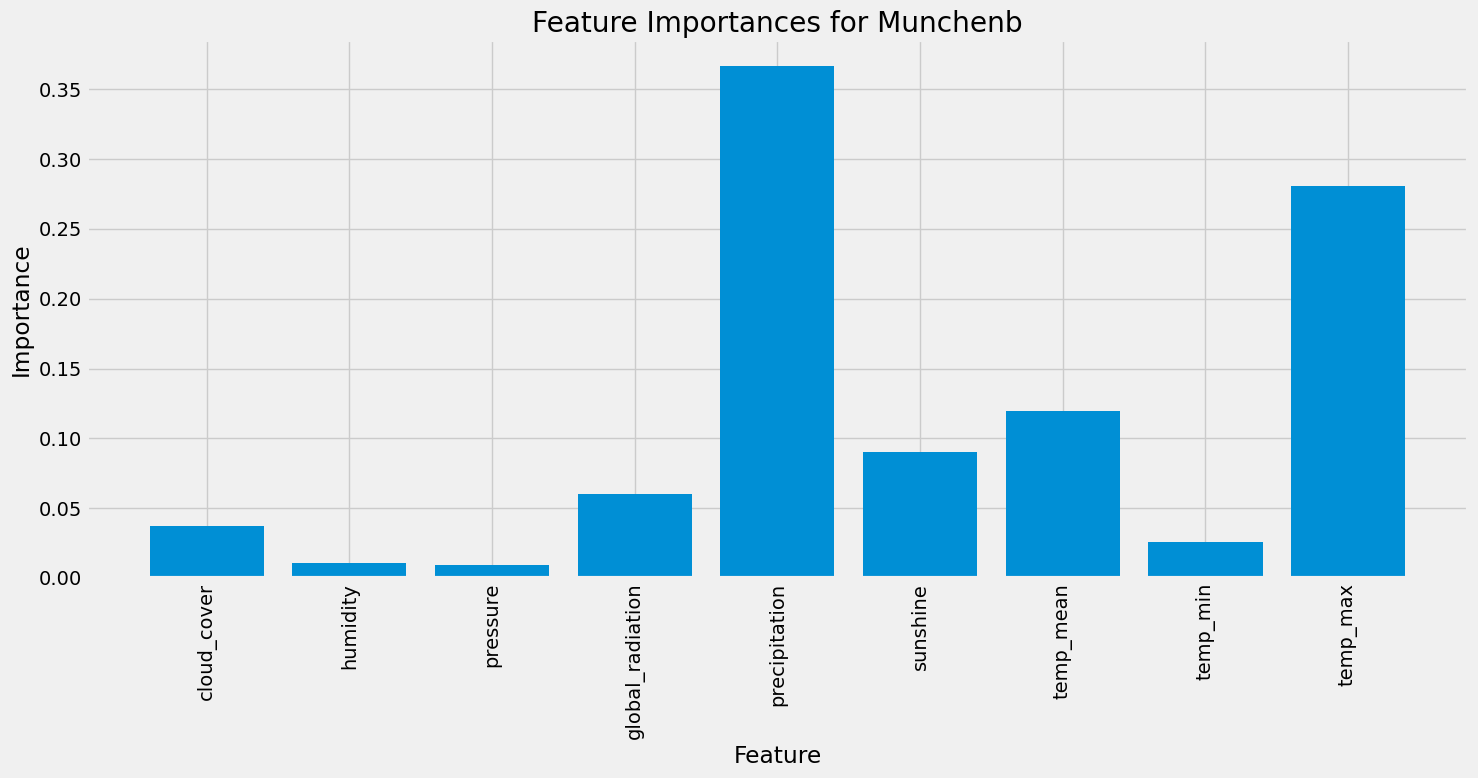

In [508]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Step 1: Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))  # fig is what you'll save

# Step 2: Plot
x_values = list(range(len(newarray)))
ax.bar(x_values, newarray)  # no orientation param here

# Step 3: Format plot
ax.set_xticks(x_values)
ax.set_xticklabels(wx_list, rotation='vertical')
ax.set_ylabel('Importance')
ax.set_xlabel('Feature')
ax.set_title('Feature Importances for Munchenb')

# Step 4: Show
plt.tight_layout()
plt.show()

In [510]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'feature_importance_munchenb.png'), dpi=300, bbox_inches='tight')

Precipitation and maximum temperature are most impotant features. Next most important is mean temperature, but it does not stand out as the first two.  